# Dodge County COVID-19 Dashboard

This notebook was created to investigate the data provided by Dodge County Health Department and provide a more accurate alternative.


# References

* https://web.archive.org/web/20200101000000*/https://www.co.dodge.wi.gov/government/departments-e-m/human-services-health-department/coronavirus-information
* https://doc.wi.gov/Pages/COVID19(Coronavirus)/COVID19TestingDashboard.aspx
* https://www.dhs.wisconsin.gov/publications/p02677.pdf
* https://www.dhs.wisconsin.gov/covid-19/data-101.htm
* https://www.co.dodge.wi.gov/government/departments-e-m/human-services-health-department/coronavirus-information
* https://globalepidemics.org/key-metrics-for-covid-suppression/?fbclid=IwAR0rmBPprbrmJgIQ8lyr8_mFXQFeSWqESg8O4fAgEjAWuWWYKRmKkXQyqP8
* https://www.co.dodge.wi.gov/home/showdocument?id=38587
* 

In [7]:
# Use the Wisconsin Department of Health Services API to get data

import pandas as pd

q = "https://opendata.arcgis.com/datasets/b913e9591eae4912b33dc5b4e88646c5_10.csv?where=GEO%20%3D%20%27County%27&outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D"
ds = pd.read_csv(q)

In [8]:
len(ds)

14400

In [9]:
# Select the county to display (population needed for calculations)

county = "Dodge"
county_population =  90005 #90005 = 26.665185 87839 = 27.322715  88759 = 27.039511

dc = ds[ds.NAME == county]

In [10]:
# Select the columns we're interested in and keep the top 14 most recent rows
dc_summary = dc[["DATE", "NEGATIVE", "POSITIVE", "DEATHS", "DTH_NEW", "HOSP_YES", "POS_NEW" ]].sort_values(["DATE"], ascending=False).head(20)

# Reverse the sort
dc_summary = dc_summary.sort_values(["DATE"], ascending=True)

# Add a calculated column for rolling percentage of positives
dc_summary["rolling_positive"] = (dc_summary["POSITIVE"]/(dc_summary["POSITIVE"] + dc_summary["NEGATIVE"])) * 100

# Add a calculated column for the "new cases per 100k of population" from the Harvard model
dc_summary["pos_new_rolling"] = dc_summary["POS_NEW"].rolling(7).mean()
dc_summary["new_per_100k"] = (dc_summary["pos_new_rolling"] / county_population) * 100000

In [11]:
# Print the last week's data
dc_summary.tail(14).sort_values(["DATE"], ascending=False)

,DATE,NEGATIVE,POSITIVE,DEATHS,DTH_NEW,HOSP_YES,POS_NEW,rolling_positive,pos_new_rolling,new_per_100k
14273,2020/09/30 14:00:00+00,23183.0,1959,17,0.0,99.0,28.0,7.791743,40.285714,44.759418
14330,2020/09/29 14:00:00+00,23085.0,1931,17,1.0,97.0,47.0,7.719060,39.714286,44.124533
14207,2020/09/28 14:00:00+00,23071.0,1884,16,0.0,96.0,47.0,7.549589,36.857143,40.950106
14129,2020/09/27 14:00:00+00,22874.0,1837,16,0.0,93.0,31.0,7.433936,33.857143,37.616958
10988,2020/09/26 14:00:00+00,22806.0,1806,16,2.0,93.0,24.0,7.337884,33.285714,36.982072
14021,2020/09/25 14:00:00+00,22659.0,1782,14,0.0,93.0,54.0,7.291027,34.857143,38.728007
14088,2020/09/24 14:00:00+00,22266.0,1728,14,0.0,92.0,51.0,7.201800,30.857143,34.283810
13955,2020/09/23 14:00:00+00,22075.0,1677,14,4.0,90.0,24.0,7.060458,28.571429,31.744268
10138,2020/09/22 14:00:00+00,21868.0,1653,10,1.0,90.0,27.0,7.027762,27.714286,30.791940
10066,2020/09/21 14:00:00+00,21745.0,1626,9,0.0,90.0,26.0,6.957340,29.857143,33.172760


## Some misc. charts

<AxesSubplot:xlabel='DATE'>

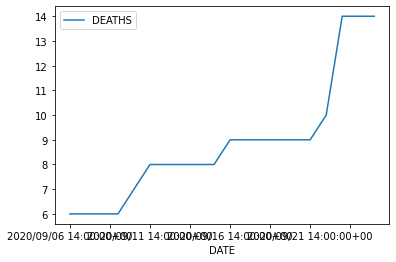

In [27]:
dc_summary.sort_values(["DATE"], ascending=True).plot(x="DATE", y="DEATHS")

<AxesSubplot:xlabel='DATE'>

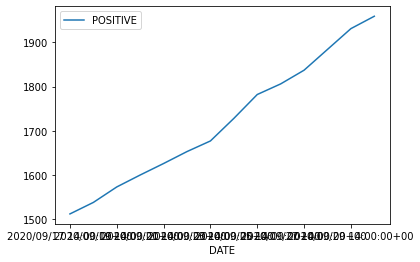

In [12]:
dc_summary.tail(14).sort_values(["DATE"], ascending=True).plot(x="DATE", y="POSITIVE")

<AxesSubplot:xlabel='DATE'>

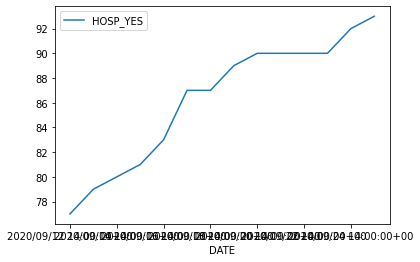

In [29]:
dc_summary.tail(14).sort_values(["DATE"], ascending=True).plot(x="DATE", y="HOSP_YES")

<AxesSubplot:xlabel='DATE'>

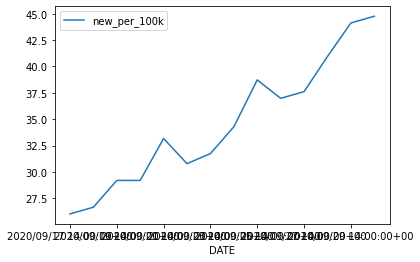

In [13]:
dc_summary.tail(14).sort_values(["DATE"], ascending=True).plot(x="DATE", y="new_per_100k")